# __DATA 5600: Introduction to Regression and Machine Learning for Analytics__

## __Notes on the Bayesian Gamma-Poisson Conjugate Model__ <br>

Author:      Tyler J. Brough <br>
Last Update: December 6, 2021 <br>

<br>

---

<br>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
np.random.seed(111111)

<br>

## __Introduction__

These notes provide an introduction to the Bayesian Gamma-Poisson conjugate model and are based in part on the following: 

* https://vioshyvo.github.io/Bayesian_inference/conjugate-distributions.html

* https://web.ma.utexas.edu/users/pmueller/compbayes/

<br>

### __The Gamma-Poisson Model__

<br>

The Poisson distribution is a dicrete distribution which models count data (positive integer values). Examples: 


* Points in a football game

* The number bicycles passing a point in the park during lunch hour

* The number of customers served at a check-out counter per hour

<br>

A Poisson random variable is denoted: 

$$
Y \sim Poisson(\lambda)
$$

and has the following properties: 

* $E[Y] = \lambda$ 

* $Var[Y] = \lambda$

* Therefore, $E[Y] = Var[Y]$ (proportional variance)

<br>

Let's simulate some observations from a $Poisson(3)$ distribution: 

<br>

In [3]:
n = 10
true_lambda = 3
y = np.random.poisson(lam=true_lambda, size=n)

In [4]:
y

array([3, 2, 6, 3, 2, 2, 5, 4, 2, 2])

<br>

### __The Likelihood__

We know that these data $\{y\}_{i=1}^{n=10}$ come from a $Poisson(3)$; but let's forget this for a minute and pretend that we are the Statistician who has obtained these data for the purpose of inference. 

<br>

We will assume that the DGP (data generating process) for these data is the Poisson:

$$
Y_{1}, \ldots, Y_{n} \sim Poisson(\lambda)
$$

That is, in a Bayesian setup we will assume a Poisson likelihood function.

<br>

The likelihood can then be written as:

$$
p(y | \lambda) = \prod_{i=1}^{n} p(y_{i} | \lambda) = \prod_{i=1}^{n} \left(\lambda^{y_{i}} \frac{e^{-\lambda}}{y_{i}!} \right) \propto \lambda^{\sum_{i=1}^{n} y_{i}} e^{-n\lambda} = \lambda^{n \bar{y}} e^{-n \lambda}
$$

<br>

Where 

$$
\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_{i}
$$

is the arithmetic mean.

<br>

### __The Prior__

<br>

A $Gamma(\alpha, \beta)$ is a convenient choice for a prior for $\lambda$ because it offers a conjugate relationship (i.e. the posterior distribution will also be in the $Gamma$ family).

<br>

So we can state the prior thus:

$$
\lambda \sim Gamma(\alpha, \beta)
$$

<br>

For now we will set the values of the hyperparameters to $\alpha = 1$ and $\beta = 1$. 

<br>

In [5]:
## Helper function to plot Beta priors
def plot_gamma(a=1, b=1):
    x = np.arange(0, 7, 0.01)
    y = stats.gamma.pdf(x, a=a, scale=1/b)
    plt.plot(x, y, lw = 2.0, color='darkblue', alpha=0.8)
    plt.fill_between(x, y, facecolor='orange', alpha=0.5)
    plt.title(f"Gamma({a},{b}) Prior Distribution")
    plt.show()

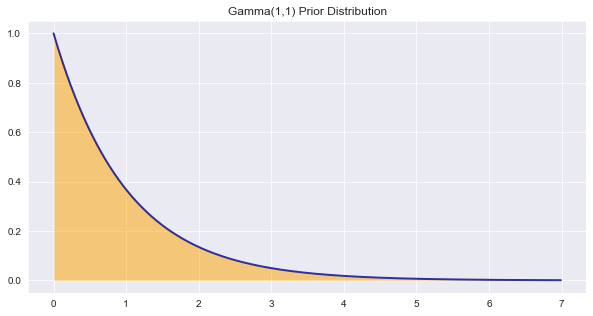

In [6]:
plot_gamma()

<br>

Now, let's plot the posterior using the 10 observations from above.

<br>

In [7]:
## Prior hyperparameters
alpha = 1
beta = 1

## Posterior hyperparameters
alpha_post = alpha + np.sum(y)
beta_post = beta + len(y)

(alpha_post, beta_post)

(32, 11)

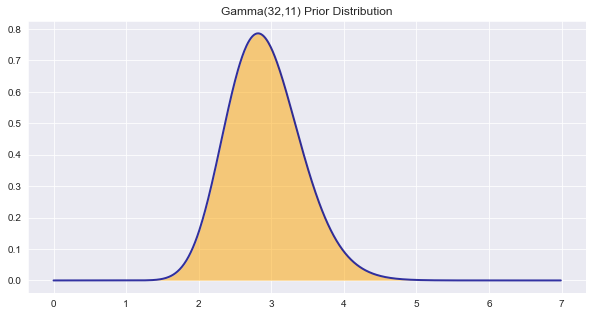

In [8]:
## Plot the posterior
plot_gamma(a=alpha_post, b=beta_post)

<br>

Credit: https://github.com/tonyduan/conjugate-bayes/blob/master/conjugate_bayes/models.py
        
<br>

In [9]:
class GammaPoisson(object):
    """
    Conjugate prior for a Poisson distribution with unknown rate λ.
    Parameters
    ----------
    alpha: prior for Gamma(alpha, beta) prior on parameter λ.
    beta:  prior for Gamma(alpha, beta) prior on parameter λ.
    """
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
        
    def fit(self, x):
        self.alpha += np.sum(x)
        self.beta += len(x)

    def plot_posterior(self):
        x = np.arange(0, 7, 0.01)
        y = stats.gamma.pdf(x, a=self.alpha, scale=1/self.beta)
        plt.plot(x, y, lw = 2.0, color='darkblue', alpha=0.8)
        plt.fill_between(x, y, facecolor='orange', alpha=0.5)
        plt.title(f"Gamma({self.alpha},{self.beta}) Prior Distribution")
        plt.show()

In [10]:
gp = GammaPoisson(1, 1)

In [11]:
gp.fit(y)

In [12]:
gp.alpha, gp.beta

(32, 11)

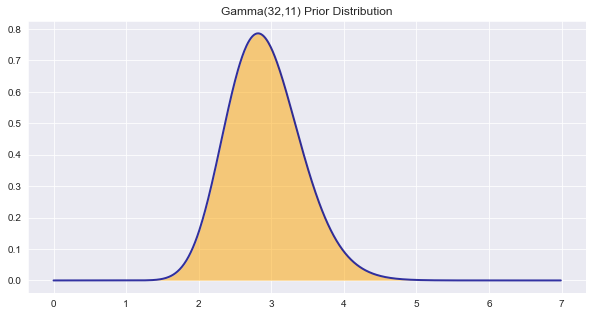

In [13]:
gp.plot_posterior()

In [14]:
np.mean(y), np.var(y)

(3.1, 1.8900000000000001)

### __A Larger Simulation Example__

* Set $n = 200$

* Set $\lambda = 3$

In [15]:
n = 200
true_lambda = 3
y = np.random.poisson(lam=true_lambda, size=n)

In [16]:
y_series = pd.Series(y)
y_series.describe()

count    200.000000
mean       3.180000
std        1.741483
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
dtype: float64

In [17]:
np.mean(y), np.var(y)

(3.18, 3.0176)

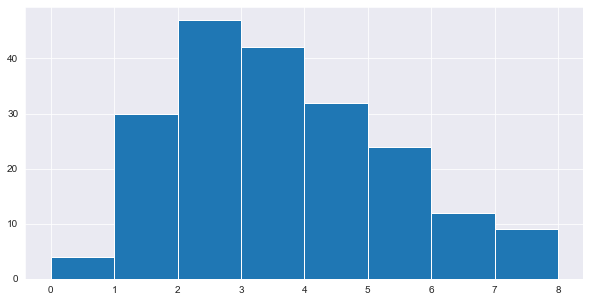

In [18]:
plt.hist(y, bins=8);

In [19]:
jeep = GammaPoisson(1, 1)
jeep.fit(y)

In [20]:
jeep.alpha, jeep.beta

(637, 201)

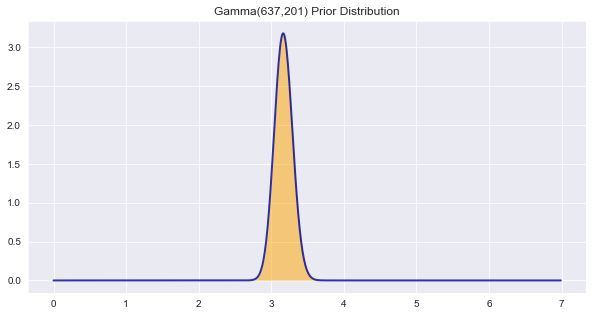

In [21]:
jeep.plot_posterior()

<br>

### __Frequentist MLE, Bootstrap, and Bayesian Comparisons__

<br>

#### __Frequentist__

In [22]:
ybar = np.mean(y)
y_var = np.var(y)
ybar, y_var

(3.18, 3.0176)

In [23]:
y_se = np.std(y, ddof=1)/np.sqrt(n)

In [39]:
ybar, y_se

(3.18, 0.1231414596936279)

In [24]:
conf_level = 0.05
lo = stats.t(n-1).ppf(conf_level/2.)
hi = stats.t(n-1).ppf(1. - (conf_level/2.))
CI = (ybar + y_se*lo, ybar + y_se*hi)

In [25]:
CI

(2.9371703926887274, 3.422829607311273)

<br>

Let's conduct a classical hypothesis test. The test is the following: 

<br>

$$
\begin{align}
H_{0}: & \quad \lambda = 3 \\
& \\
H_{a}: & \quad \lambda \ne 3
\end{align}
$$

<br>

To do this of course we form the following test statistic:

<br>

$$
t = \frac{\bar{y} - 3}{s / \sqrt{n}}
$$

<br>

Which we can compute rather easily in Python:

<br>


In [26]:
t = (ybar - 3.) / y_se
t

1.4617335253929467

In [29]:
## Two-tailed t-test with 5% confidence level
α = 0.05
t_crit = np.abs(stats.t(n-1).ppf(1. - (α / 2.)))
t_crit

1.971956544249395

In [30]:
t > t_crit

False

<br>

We fail to reject the null hypothesis.

<br>

#### __Bootstrap__

In [45]:
B = 10_000
y_bar_star = np.zeros(B)
t_star = np.zeros(B)

for b in range(B):
    y_star = np.random.choice(y, size=n, replace=True)
    y_bar_star[b] = np.mean(y_star)
    t_star[b] = y_bar_star[b] - 3.

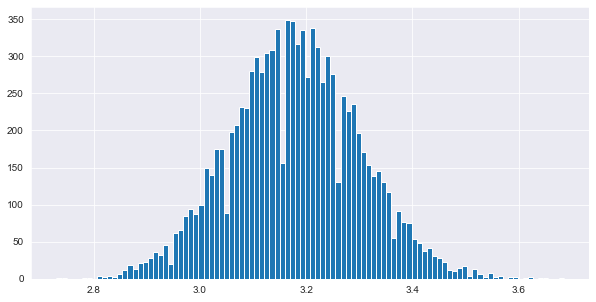

In [46]:
plt.hist(y_bar_star, bins=100);

In [47]:
y_bar_star.sort()

In [48]:
y_bar_star_se = np.std(y_bar_star, ddof=1)

In [49]:
y_bar_star.mean(), y_bar_star_se

(3.1789004999999997, 0.12205807395290043)

In [50]:
α = 0.05
lb = int(B * α / 2.)
ub = int(B * (1. - α / 2.))
lb, ub

(250, 9750)

In [51]:
CI_star = y_bar_star[lb], y_bar_star[ub]

In [52]:
CI_star

(2.94, 3.42)

In [54]:
t_star /= y_bar_star_se

In [56]:
np.mean(t_star)

1.465699844395659

This is just to show that we can arrive at a standardized $t$-stat in much the same way. But the hypothesis test is rather trivial in actuality because we are working with the non-standardized bootstrap sampling distribution.

<br>

We would just compare the hypothesized value of $3$ to the $97.5$th quantile

<br>

In [58]:
3. >= y_bar_star[ub]

False

<br>

So again we fail to reject the null hypothesis. 

<br>